 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [236]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [237]:
# Reading whale returns
whale_returns = pd.read_csv('whale_returns.csv', index_col='Date', parse_dates=True)
print(whale_returns.head())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  


In [238]:
# Count nulls
whale_null_counts = whale_returns.isnull().sum()
print(whale_null_counts)

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [239]:
# Drop nulls
whale_returns_cleaned = whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [240]:
# Reading algorithmic returns
algo_returns = pd.read_csv('algo_returns.csv', index_col='Date', parse_dates=True)
print(algo_returns.head())

              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN


In [241]:
# Count nulls
algo_null_counts = algo_returns.isnull().sum()

In [242]:
# Drop nulls
algo_returns_cleaned = algo_returns.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [243]:
# Reading S&P 500 closing prices
sp500_history = pd.read_csv('sp500_history.csv', index_col='Date', parse_dates=True)
print(sp500_history.head())

               Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06


In [244]:
# Check data ytypes
print("Data Types:")
print(sp500_history.dtypes)

Data Types:
Close    object
dtype: object


In [245]:
# Fix data types
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '').astype(float)

C:\Users\ricky\AppData\Local\Temp\ipykernel_35300\2798792206.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace('$', '').astype(float)


In [246]:
# Calculate daily Returns
sp500_returns = sp500_history['Close'].pct_change()
print (sp500_returns)

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: Close, Length: 1649, dtype: float64


In [247]:
# Drop nulls
sp500_history_cleaned = sp500_history.dropna()

In [248]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename('S&P 500 Daily Returns')
print("S&P 500 Daily Returns:")
print(sp500_returns.head())

S&P 500 Daily Returns:
Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64


## Combine Whale, Algorithmic, and S&P 500 Returns

In [249]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis=1)

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

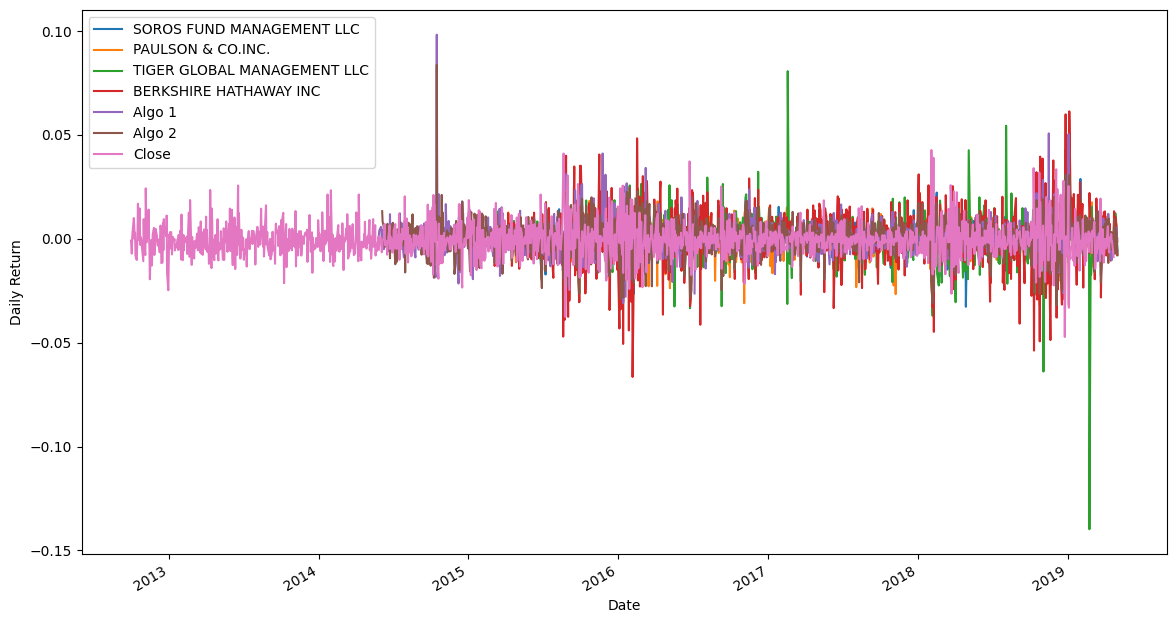

In [250]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(14, 8))
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

#### Calculate and Plot cumulative returns.

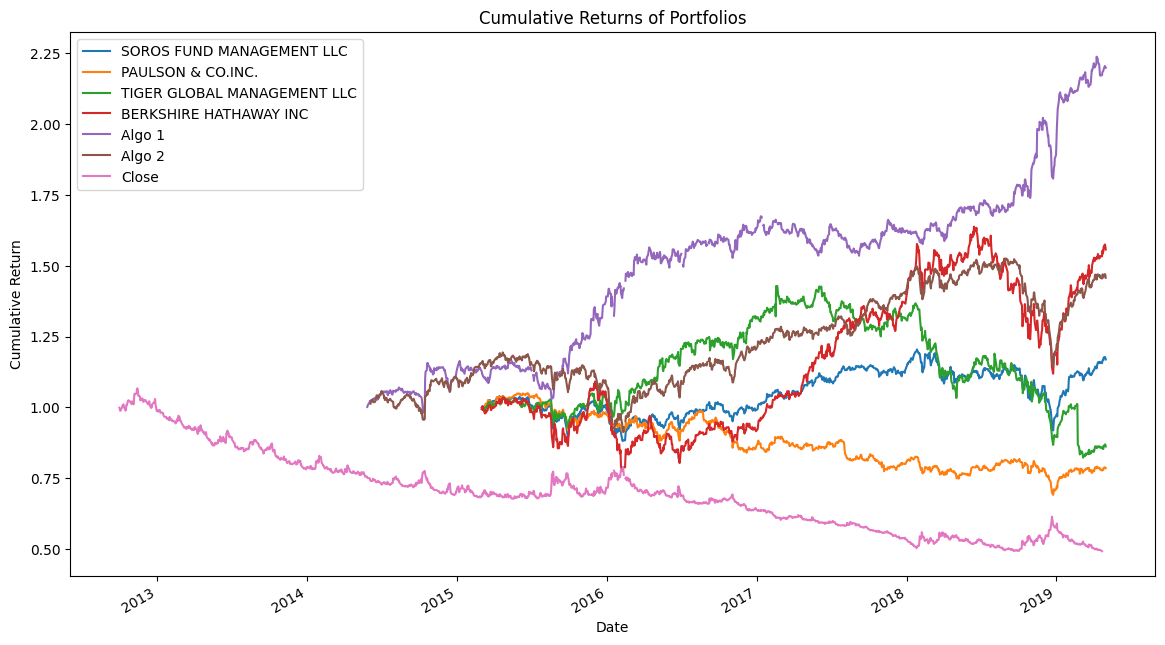

In [251]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()

# Plotting cumulative returns
cumulative_returns.plot(figsize=(14, 8))
plt.title('Cumulative Returns of Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


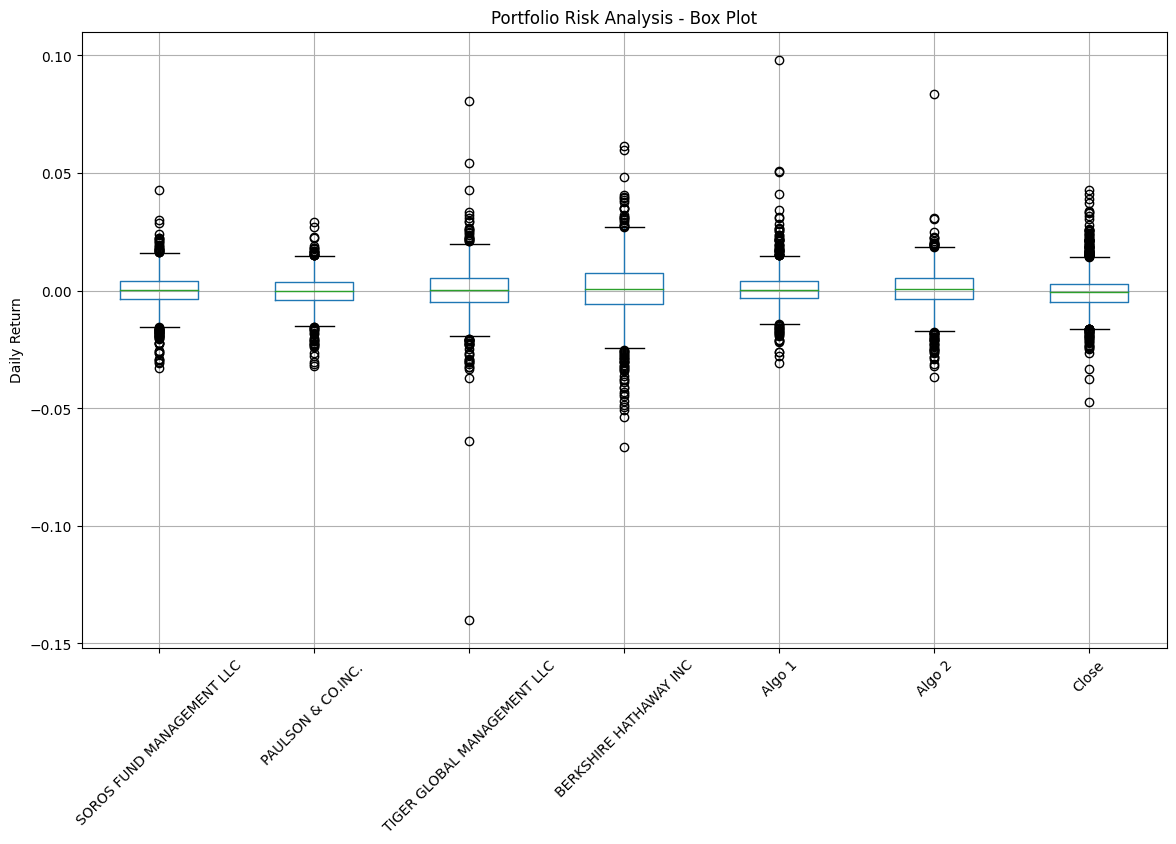

In [252]:
# Box plot to visually show risk
combined_returns.boxplot(figsize=(14, 8))
plt.title('Portfolio Risk Analysis - Box Plot')
plt.ylabel('Daily Return')
plt.xticks(rotation=45)
plt.show()

### Calculate Standard Deviations

In [253]:
# Calculate the daily standard deviations of all portfolios
portfolio_standarddev = combined_returns.std()
print("Standard Deviations for All:")
print(portfolio_standarddev)

Standard Deviations for All:
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007972
Algo 2                         0.008466
Close                          0.008135
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [254]:
# Calculate  the daily standard deviation of S&P 500
sp500_standarddev = sp500_returns.std()
# Determine which portfolios are riskier than the S&P 500
riskier_than_sp500 = portfolio_standarddev > sp500_standarddev
print("Riskier than S&P 500:")
print(riskier_than_sp500)

Riskier than S&P 500:
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                          True
Close                          False
dtype: bool


### Calculate the Annualized Standard Deviation

In [255]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standarddev = pd.concat([whale_returns_cleaned, algo_returns_cleaned], axis=1).std() * (252 ** 0.5)
print("Annualized Standard deviation:")
print(annualized_standarddev)

Annualized Standard deviation:
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
Algo 1                         0.126801
Algo 2                         0.134401
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Figure size 1400x800 with 0 Axes>

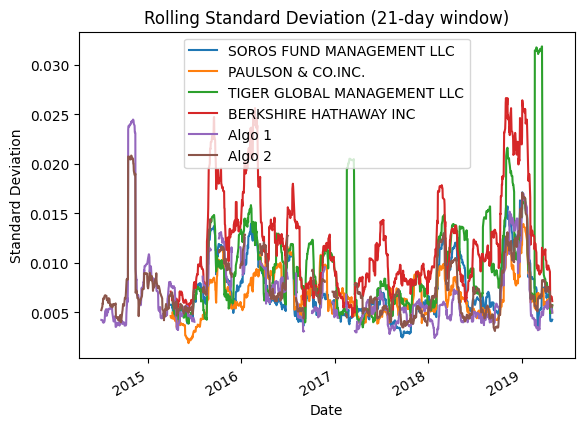

In [256]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = pd.concat([whale_returns_cleaned, algo_returns_cleaned], axis=1).rolling(window=21).std()
# Plot the rolling standard deviation
plt.figure(figsize=(14, 8))
rolling_std.plot(title='Rolling Standard Deviation (21-day window)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

### Calculate and plot the correlation

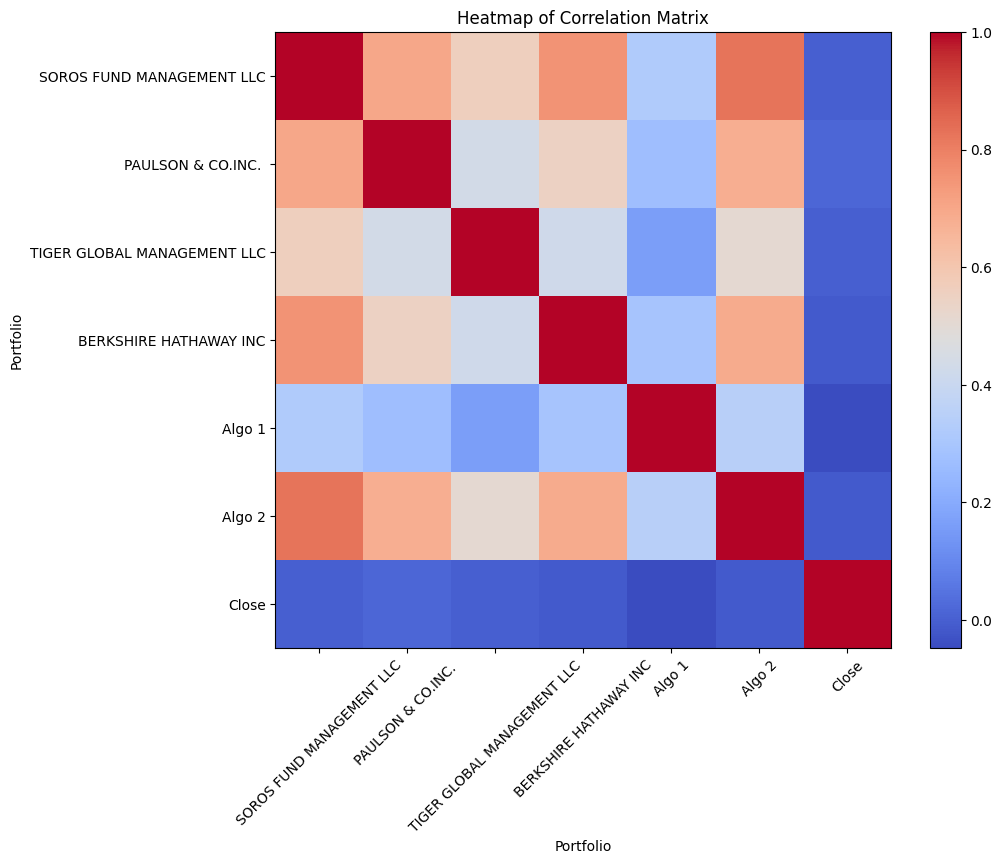

In [257]:
# Calculate the correlation
correlation_matrix = all_returns.corr()

# display correlation matrix
plt.figure(figsize=(10, 8))
plt.title('Heatmap of Correlation Matrix')
plt.xlabel('Portfolio')
plt.ylabel('Portfolio')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Beta for SOROS FUND MANAGEMENT LLC vs. S&P 500: 0.0005878170301680353
Beta for PAULSON & CO.INC.  vs. S&P 500: 0.012352064767622292
Beta for TIGER GLOBAL MANAGEMENT LLC vs. S&P 500: -0.0021279459462448264
Beta for BERKSHIRE HATHAWAY INC vs. S&P 500: -0.02322885203069892


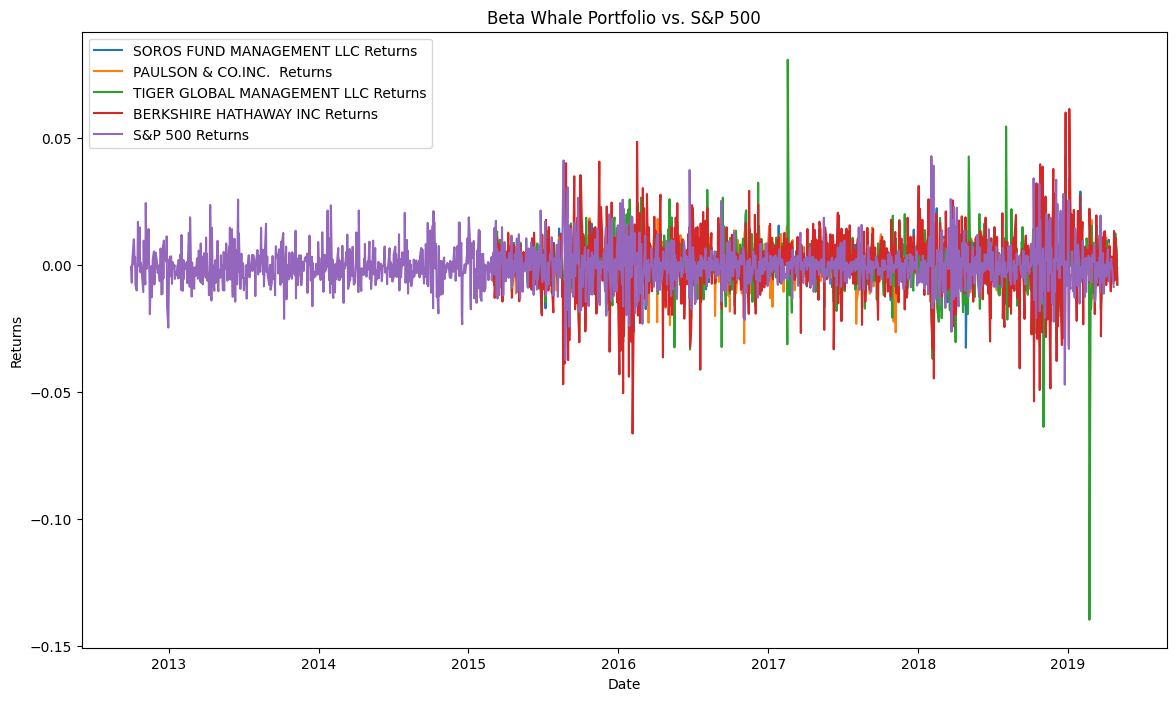

In [258]:
# Calculate covariance of a single portfolio
# Calculate variance of S&P 500
variance_sp500 = sp500_returns.var()
# Computing beta
for portfolio_name in whale_returns_cleaned.columns:
    portfolio_returns = whale_returns_cleaned[portfolio_name]
    covariance = portfolio_returns.cov(sp500_returns)
    beta = covariance / variance_sp500
    print(f'Beta for {portfolio_name} vs. S&P 500: {beta}')

# Plot beta trend

# Plot the beta values
plt.figure(figsize=(14, 8))
for portfolio_name in whale_returns_cleaned.columns:
    portfolio_returns = whale_returns_cleaned[portfolio_name]
    plt.plot(portfolio_returns, label=f'{portfolio_name} Returns')

plt.plot(sp500_returns, label='S&P 500 Returns')
plt.title('Beta Whale Portfolio vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [259]:
# Use `ewm` to calculate the rolling window
ewm = 21 
rolling_std_ewm = whale_returns_cleaned.ewm(span=ewm).std()
print (rolling_std_ewma)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                   0.002472            0.005814   
2015-03-05                   0.002658            0.004896   
2015-03-06                   0.005515            0.004592   
2015-03-09                   0.004716            0.004434   
...                               ...                 ...   
2019-04-25                   0.004773            0.005046   
2019-04-26                   0.004944            0.005556   
2019-04-29                   0.004722            0.005334   
2019-04-30                   0.004612            0.005162   
2019-05-01                   0.004940            0.004952   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                          NaN                     NaN  
2015-03-

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [260]:
# Annualized Sharpe Ratios
trading_days_per_year = 252  # Adjust as needed
sharpe_ratios = (whale_returns.mean() * trading_days_per_year) / (whale_returns.std() * np.sqrt(trading_days_per_year))
print (sharpe_ratios)

SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
dtype: float64


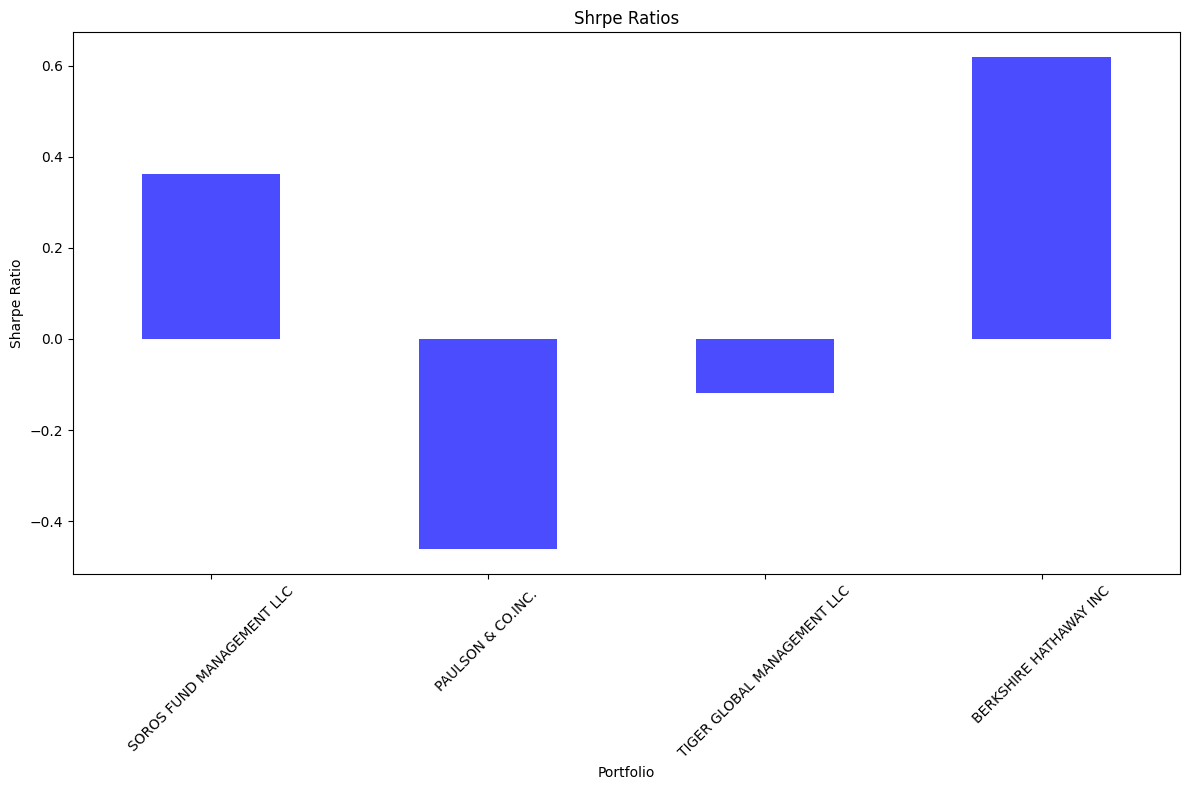

In [261]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(12, 8))
sharpe_ratios.plot(kind='bar', color='b', alpha=0.7)
plt.title('Shrpe Ratios')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [272]:
# Reading data from 1st stock
aapl_historical = pd.read_csv('aapl_historical.csv')

In [273]:
# Reading data from 2nd stock
cost_historical = pd.read_csv('cost_historical.csv')

In [274]:
# Reading data from 3rd stock
goog_historical = pd.read_csv('goog_historical.csv')

In [280]:
# Combine all stocks in a single DataFrame
combined = pd.concat([goog_historical, cost_historical, aapl_historical], ignore_index=True)

In [283]:
# Reset Date index
combined.reset_index

<bound method DataFrame.reset_index of     Symbol Trade DATE     NOCP
0     GOOG   5/9/2019  1162.38
1     GOOG   5/8/2019  1166.27
2     GOOG   5/7/2019  1174.10
3     GOOG   5/6/2019  1189.39
4     GOOG   5/3/2019  1185.40
..     ...        ...      ...
745   AAPL  5/17/2018   186.99
746   AAPL  5/16/2018   188.18
747   AAPL  5/15/2018   186.44
748   AAPL  5/14/2018   188.15
749   AAPL  5/11/2018   188.59

[750 rows x 3 columns]>

In [288]:
# Reorganize portfolio data by having a column per symbol
reorganized = combined_historical.pivot(columns='Symbol')

# Display the reorganized DataFrame
print(reorganized)

       Trade DATE                   NOCP              
Symbol       AAPL COST      GOOG    AAPL COST     GOOG
0             NaN  NaN  5/9/2019     NaN  NaN  1162.38
1             NaN  NaN  5/8/2019     NaN  NaN  1166.27
2             NaN  NaN  5/7/2019     NaN  NaN  1174.10
3             NaN  NaN  5/6/2019     NaN  NaN  1189.39
4             NaN  NaN  5/3/2019     NaN  NaN  1185.40
..            ...  ...       ...     ...  ...      ...
745     5/17/2018  NaN       NaN  186.99  NaN      NaN
746     5/16/2018  NaN       NaN  188.18  NaN      NaN
747     5/15/2018  NaN       NaN  186.44  NaN      NaN
748     5/14/2018  NaN       NaN  188.15  NaN      NaN
749     5/11/2018  NaN       NaN  188.59  NaN      NaN

[750 rows x 6 columns]


In [297]:
# Calculate daily returns
combined_historical['Daily_Return'] = combined_historical['NOCP'].pct_change()
# Drop NAs
combined_historical_dropna = combined_historical.dropna()
# Display sample data
print(combined_historical_dropna.head())

  Symbol Trade DATE     NOCP  Daily_Return
1   GOOG   5/8/2019  1166.27      0.003347
2   GOOG   5/7/2019  1174.10      0.006714
3   GOOG   5/6/2019  1189.39      0.013023
4   GOOG   5/3/2019  1185.40     -0.003355
5   GOOG   5/2/2019  1162.61     -0.019226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [317]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
weighted_returns = reorganized['NOCP'] * weights
portfolio_return = weighted_returns.sum(axis=1)
# Display sample data
print(reorganized.head)
print(weighted_returns.head)
print(portfolio_return.head)

<bound method NDFrame.head of        Trade DATE                   NOCP              
Symbol       AAPL COST      GOOG    AAPL COST     GOOG
0             NaN  NaN  5/9/2019     NaN  NaN  1162.38
1             NaN  NaN  5/8/2019     NaN  NaN  1166.27
2             NaN  NaN  5/7/2019     NaN  NaN  1174.10
3             NaN  NaN  5/6/2019     NaN  NaN  1189.39
4             NaN  NaN  5/3/2019     NaN  NaN  1185.40
..            ...  ...       ...     ...  ...      ...
745     5/17/2018  NaN       NaN  186.99  NaN      NaN
746     5/16/2018  NaN       NaN  188.18  NaN      NaN
747     5/15/2018  NaN       NaN  186.44  NaN      NaN
748     5/14/2018  NaN       NaN  188.15  NaN      NaN
749     5/11/2018  NaN       NaN  188.59  NaN      NaN

[750 rows x 6 columns]>
<bound method NDFrame.head of Symbol       AAPL  COST        GOOG
0             NaN   NaN  387.460000
1             NaN   NaN  388.756667
2             NaN   NaN  391.366667
3             NaN   NaN  396.463333
4             NaN   

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [320]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([whale_returns, portfolio_returns], axis=1)

In [323]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns_dropna = combined_returns.dropna()
print(combined_returns_dropna.head())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  \
Date                                                              
2015-03-03                    -0.000496               -0.006569   
2015-03-04                    -0.002534                0.004213   
2015-03-05                     0.002355                0.006726   
2015-03-06                    -0.008481               -0.013098   
2015-03-09                     0.005843               -0.001652   

            BERKSHIRE HATHAWAY INC  
Date                                
2015-03-03               -0.

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [331]:
# Calculate the annualized `std`
std = combined_returns_dropna.std()
annualized_std = daily_std * np.sqrt(252)
print('Annualized Stanard Deviation:')
print(annualized_std)

Annualized Stanard Deviation:
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64


### Calculate and plot rolling `std` with 21-day window

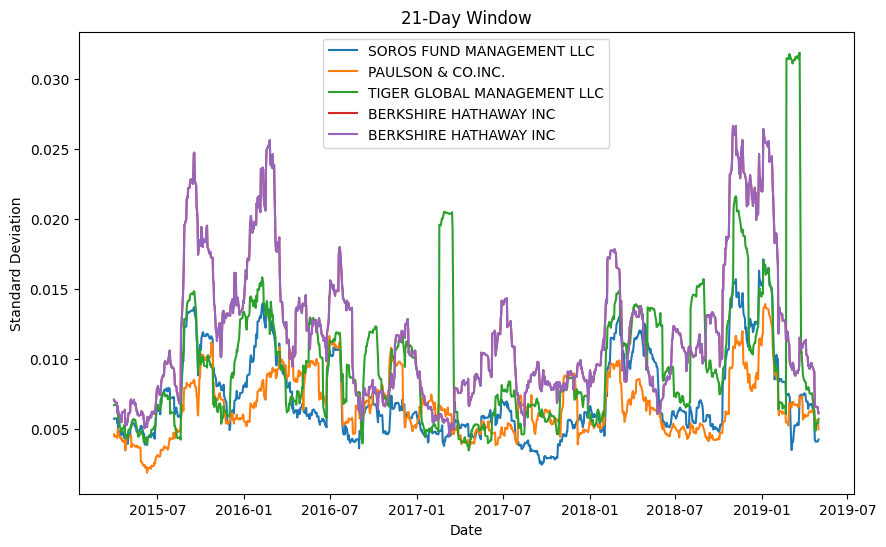

In [332]:
# Calculate rolling standard deviation
rolling_std = combined_returns_dropna.rolling(window=21).std()
# Plot rolling standard deviation
plt.figure(figsize=(10, 6))
plt.plot(rolling_std)
plt.title('21-Day Window')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend(rolling_std.columns)
plt.show()

### Calculate and plot the correlation

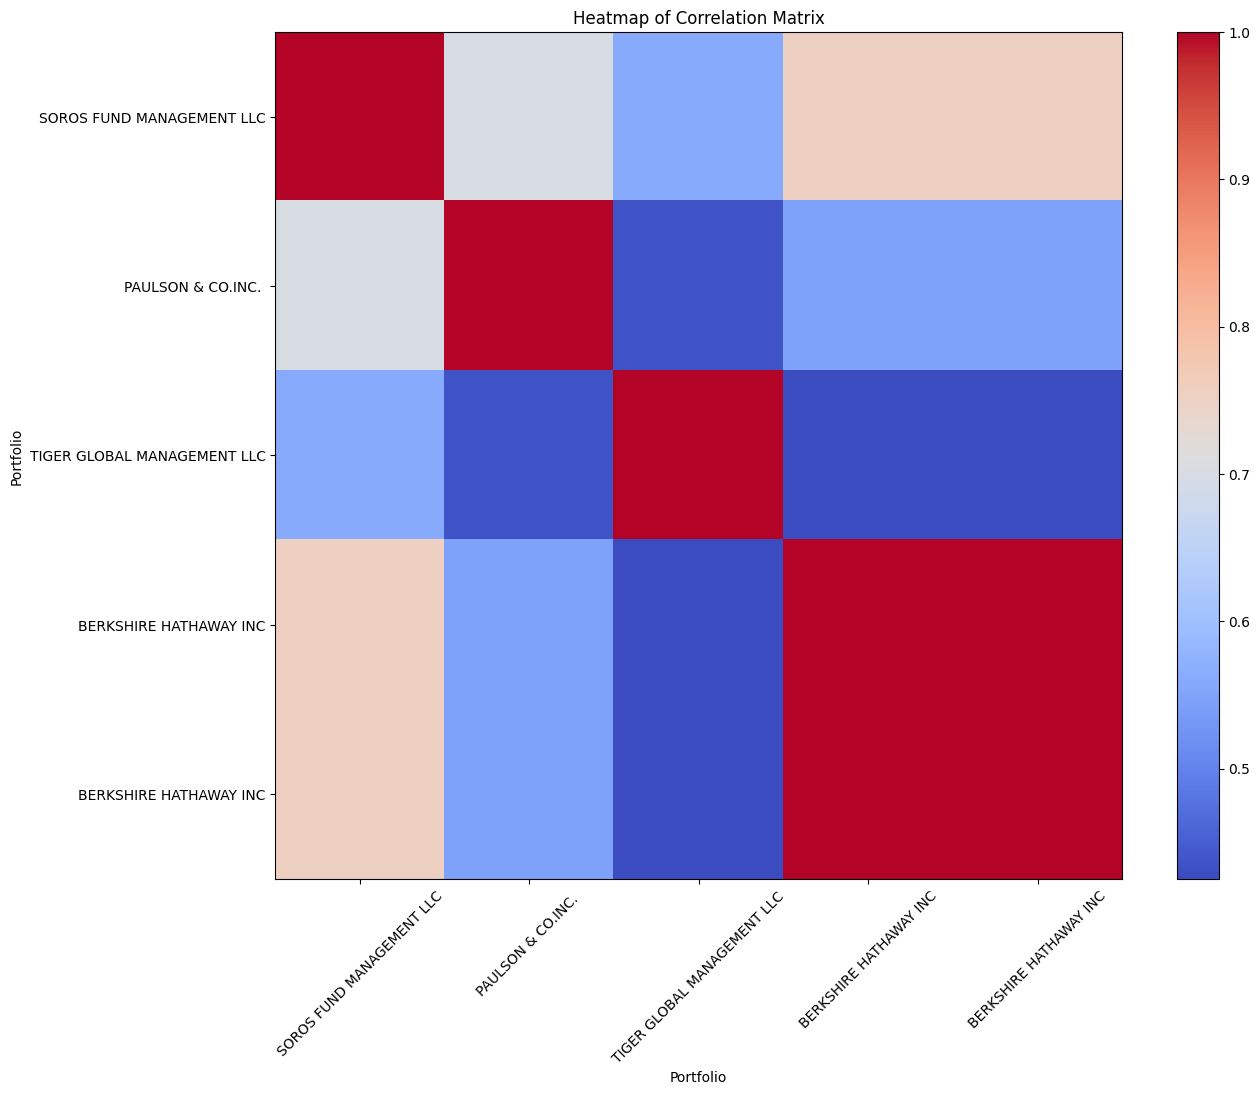

In [336]:
# Calculate and plot the correlation
correlation_matrix = combined_returns_dropna.corr()
plt.figure(figsize=(14, 11))
plt.title('Heatmap of Correlation Matrix')
plt.xlabel('Portfolio')
plt.ylabel('Portfolio')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [353]:
# Calculate and plot Beta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rolling_covariance = combined_returns_cleaned.rolling(window=60).cov(combined_returns_cleaned)
rolling_variance_sp500 = combined_returns_cleaned.rolling(window=60).var()

rolling_beta = rolling_covariance / rolling_variance_sp500



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [354]:
# Calculate Annualized Sharpe Ratios
trading_days_per_year = 252  # Adjust as needed
sharpe_ratios = (combined_returns_cleaned.mean() * trading_days_per_year) / (combined_returns_cleaned.std() * np.sqrt(trading_days_per_year))
print (sharpe_ratios)

SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
BERKSHIRE HATHAWAY INC         0.619628
dtype: float64


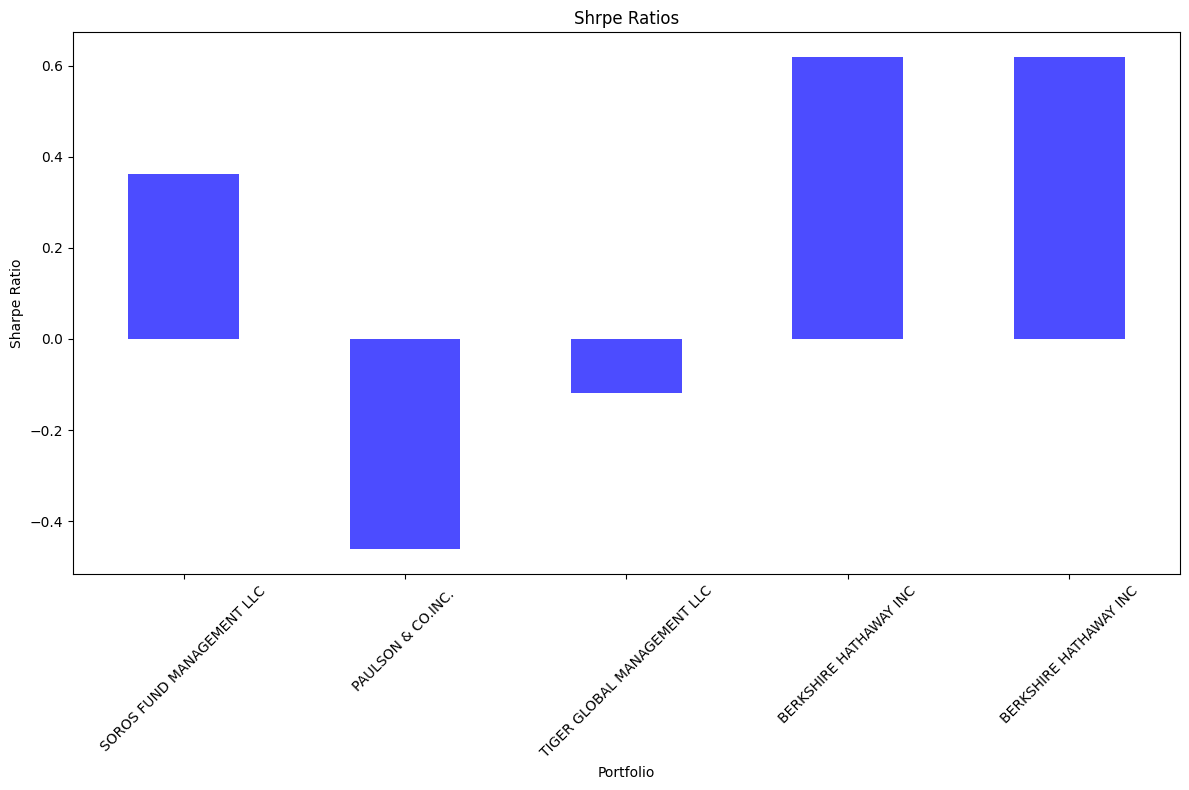

In [358]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(12, 8))
sharpe_ratios.plot(kind='bar', color='b', alpha=0.7)
plt.title('Shrpe Ratios')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### How does your portfolio do?

Write your answer here!

In [ ]:
#The portoflio does well! It is riskier but had more returns!